In [2]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the data 
df=pd.read_csv('Churn_Modelling.csv')

In [4]:
#Inspect the data 
print("Displaying Basic information : ")
print(df.info())

Displaying Basic information : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [5]:
print("\n First 5 rows :")
print(df.head())


 First 5 rows :
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       

In [6]:
#Shape of the dataset
print("Shape of the Dataset (row, columns) : ",df.shape)

Shape of the Dataset (row, columns) :  (10000, 14)


In [7]:
print("Missing Values : ")
df.isnull().sum()

Missing Values : 


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#Counting the number of duplicated rows 
duplicated_values=df.duplicated().sum()
print("The number of duplicate rows are : ",duplicated_values)

The number of duplicate rows are :  0


In [9]:
#Removing unwanted column
df.drop(columns='RowNumber', inplace=True)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


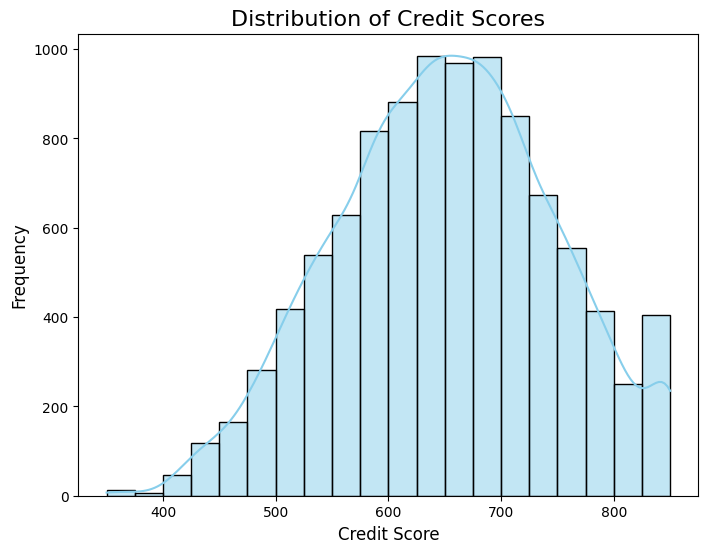

In [20]:
#Distribution of Credit Scores
plt.figure(figsize=(8, 6))
sns.histplot(df['CreditScore'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Credit Scores', fontsize=16)
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


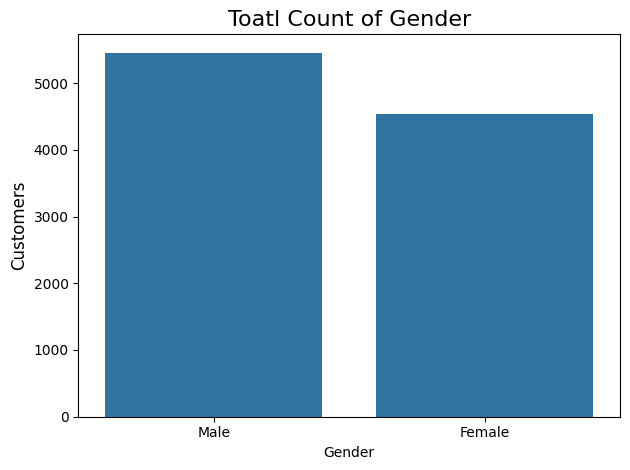

In [11]:
#Calculating Gender count
gender=df['Gender'].value_counts().reset_index()
sns.barplot(data=gender,x='Gender',y='count')
plt.title('Toatl Count of Gender',fontsize=16)
plt.ylabel('Gender',fontsize=12)
plt.ylabel('Customers',fontsize=12)
plt.tight_layout()
plt.show()

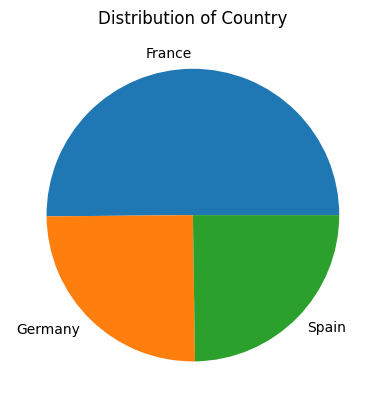

In [12]:
#Distribution of Country
plt.figure(figsize=(4,6))
plt.pie(df['Geography'].value_counts(),labels=['France','Germany','Spain'])
plt.title('Distribution of Country')
plt.tight_layout()
plt.show()

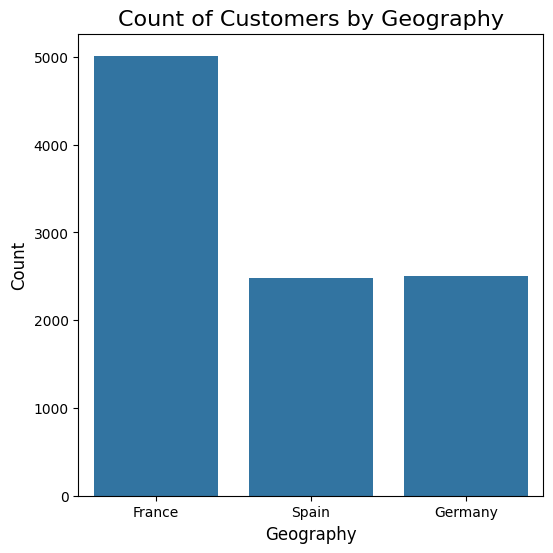

In [13]:

#Count of Customers by Geography
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Geography')
plt.title('Count of Customers by Geography', fontsize=16)
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

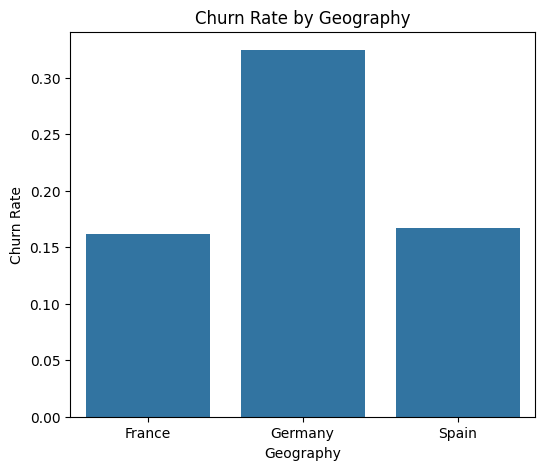

In [14]:
# Churn rate by Geography
churn_rate_geo = df.groupby('Geography')['Exited'].mean().reset_index()
plt.figure(figsize=(6, 5))
sns.barplot(x='Geography', y='Exited', data=churn_rate_geo)
plt.title('Churn Rate by Geography')
plt.ylabel('Churn Rate')
plt.show()

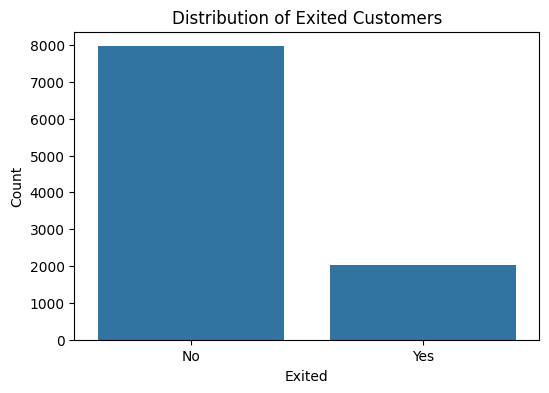

In [15]:
# Check distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Exited')
plt.title('Distribution of Exited Customers')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

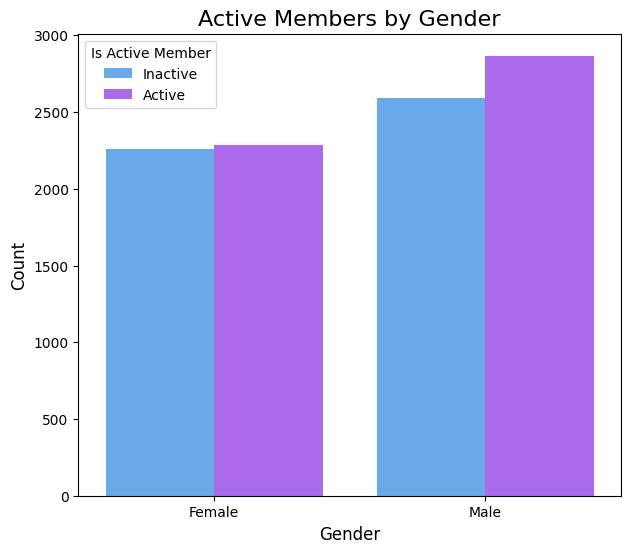

In [22]:

#Active Members by Gender
plt.figure(figsize=(7, 6))
sns.countplot(data=df, x='Gender', hue='IsActiveMember', palette='cool')
plt.title('Active Members by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Is Active Member', labels=['Inactive', 'Active'])
plt.show()

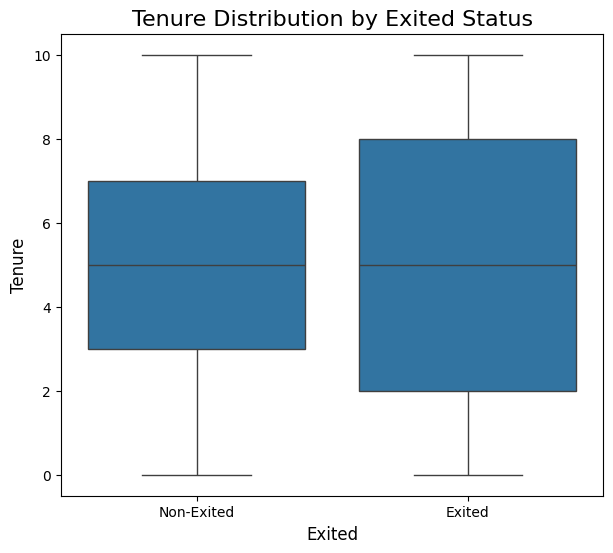

In [23]:
#Tenure Distribution by Exited Status
plt.figure(figsize=(7, 6))
sns.boxplot(data=df, x='Exited', y='Tenure')
plt.title('Tenure Distribution by Exited Status', fontsize=16)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('Tenure', fontsize=12)
plt.xticks([0, 1], ['Non-Exited', 'Exited'])
plt.show()

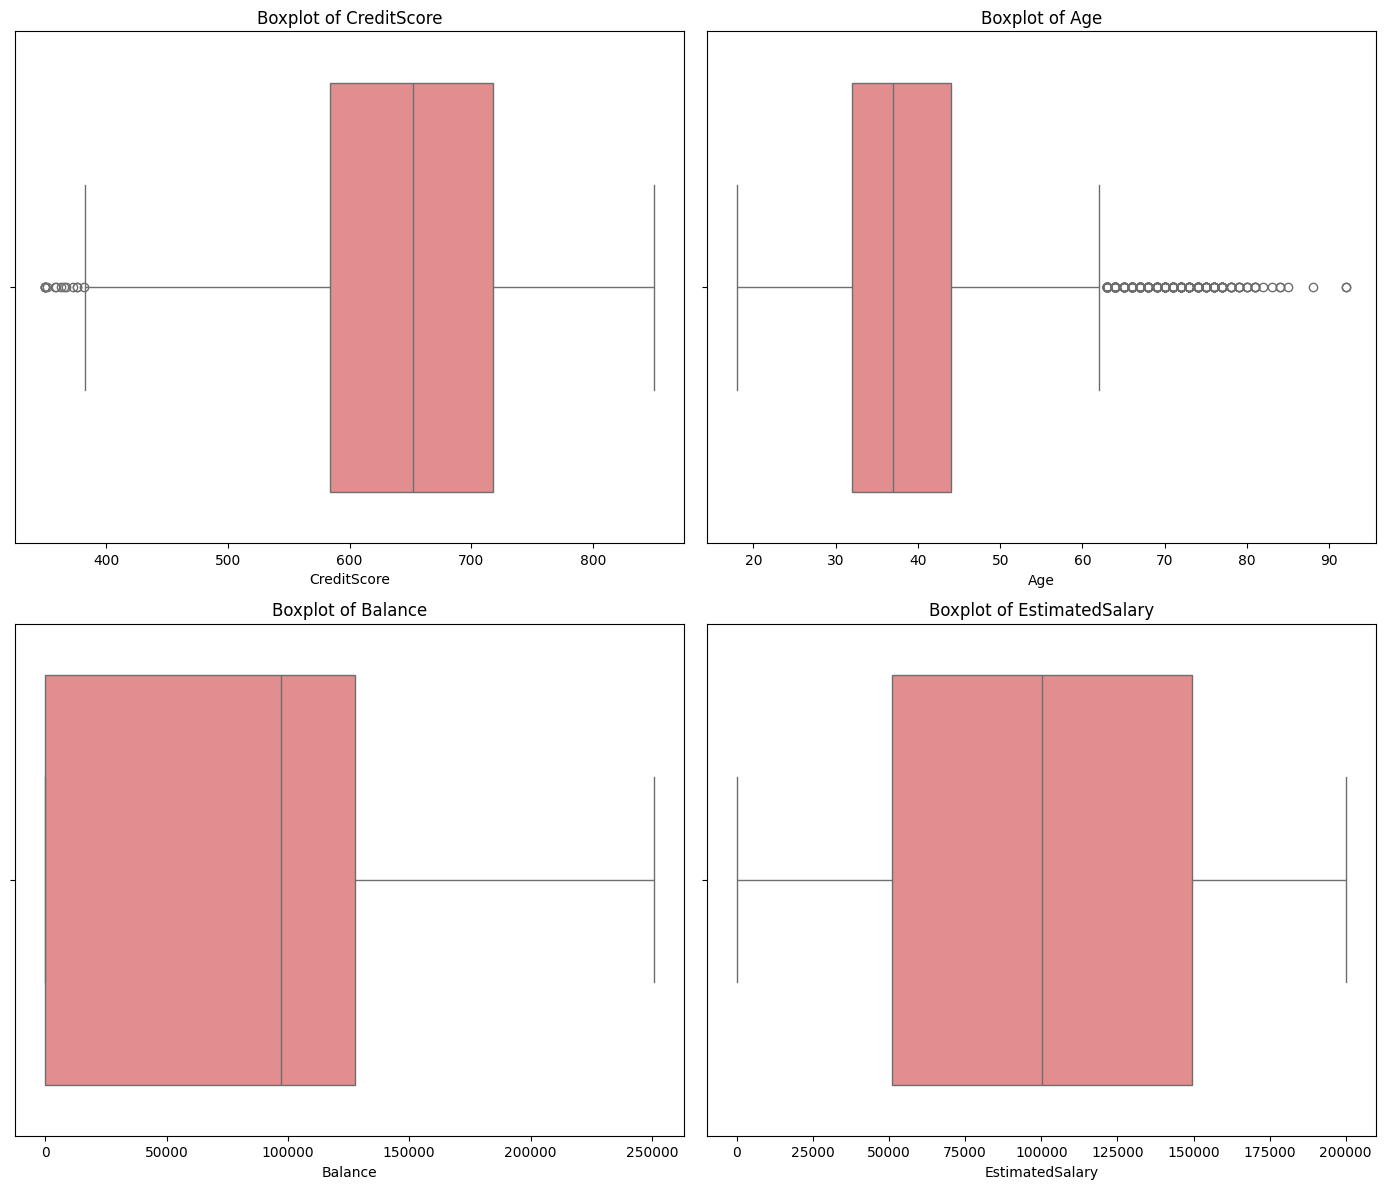

In [18]:

#Boxplot to Detect Outliers for Numerical Features
numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

for ax, col in zip(axes.flatten(), numerical_cols):
    sns.boxplot(x=df[col], ax=ax, color='lightcoral')
    ax.set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [19]:
# Remove outliers using IQR method for 'Age'
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data
data_no_outliers = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
print("Shape after removing outliers for Age:", data_no_outliers.shape)

Shape after removing outliers for Age: (9641, 13)
